#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
%matplotlib inline

#### Load Data

In [2]:
df = pd.read_csv('../data/benin-malanville.csv')
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (525600, 19)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [3]:
print("=== BASIC INFO ===")
df.info()

print("\n=== MISSING VALUES ===")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_report = pd.DataFrame({'Missing Count': missing, 'Missing %': missing_pct})
missing_report[missing_report['Missing Count'] > 0].sort_values('Missing %', ascending=False)

=== BASIC INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB     

,Missing Count,Missing %
Comments,525600,100.0


In [4]:
print("=== NUMERICAL SUMMARY ===")
df.describe()

=== NUMERICAL SUMMARY ===


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


#### Data Cleaning

In [5]:
print("=== DATA CLEANING ===")

# Convert timestamp
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
print("Timestamp converted to datetime")

# Drop Comments column (100% missing)
df = df.drop('Comments', axis=1)
print("Dropped Comments column")

# Check negative values in solar metrics
solar_cols = ['GHI', 'DNI', 'DHI']
negatives = {}
for col in solar_cols:
    neg_count = (df[col] < 0).sum()
    negatives[col] = neg_count
    print(f"{col}: {neg_count} negative values ({neg_count/len(df)*100:.2f}%)")

negatives

=== DATA CLEANING ===
Timestamp converted to datetime
Dropped Comments column
GHI: 258847 negative values (49.25%)
DNI: 275987 negative values (52.51%)
DHI: 259182 negative values (49.31%)


{'GHI': np.int64(258847), 'DNI': np.int64(275987), 'DHI': np.int64(259182)}

#### Handle negative solar values

In [6]:
# Replace negative solar values with 0 (physically meaningful)
for col in solar_cols:
    df[col] = df[col].clip(lower=0)

print("Negative solar values set to 0")

# Verify the fix
print("\n=== AFTER CLEANING ===")
for col in solar_cols:
    print(f"{col} min: {df[col].min():.2f}, max: {df[col].max():.2f}")

Negative solar values set to 0

=== AFTER CLEANING ===
GHI min: 0.00, max: 1413.00
DNI min: 0.00, max: 952.30
DHI min: 0.00, max: 759.20


#### Outlier Detection & Time Series Analysis

In [7]:
print("=== OUTLIER DETECTION ===")
from scipy import stats

# Columns for outlier detection (as specified in challenge)
outlier_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Calculate Z-scores and flag outliers (>3 standard deviations)
outliers = {}
for col in outlier_cols:
    z_scores = np.abs(stats.zscore(df[col]))
    outlier_count = (z_scores > 3).sum()
    outliers[col] = outlier_count
    print(f"{col}: {outlier_count} outliers ({outlier_count/len(df)*100:.4f}%)")

outliers_df = pd.DataFrame.from_dict(outliers, orient='index', columns=['Outlier_Count'])
outliers_df

=== OUTLIER DETECTION ===
GHI: 90 outliers (0.0171%)
DNI: 2 outliers (0.0004%)
DHI: 3889 outliers (0.7399%)
ModA: 27 outliers (0.0051%)
ModB: 63 outliers (0.0120%)
WS: 3109 outliers (0.5915%)
WSgust: 3500 outliers (0.6659%)


,Outlier_Count
GHI,90
DNI,2
DHI,3889
ModA,27
ModB,63
WS,3109
WSgust,3500


=== TIME SERIES ANALYSIS ===


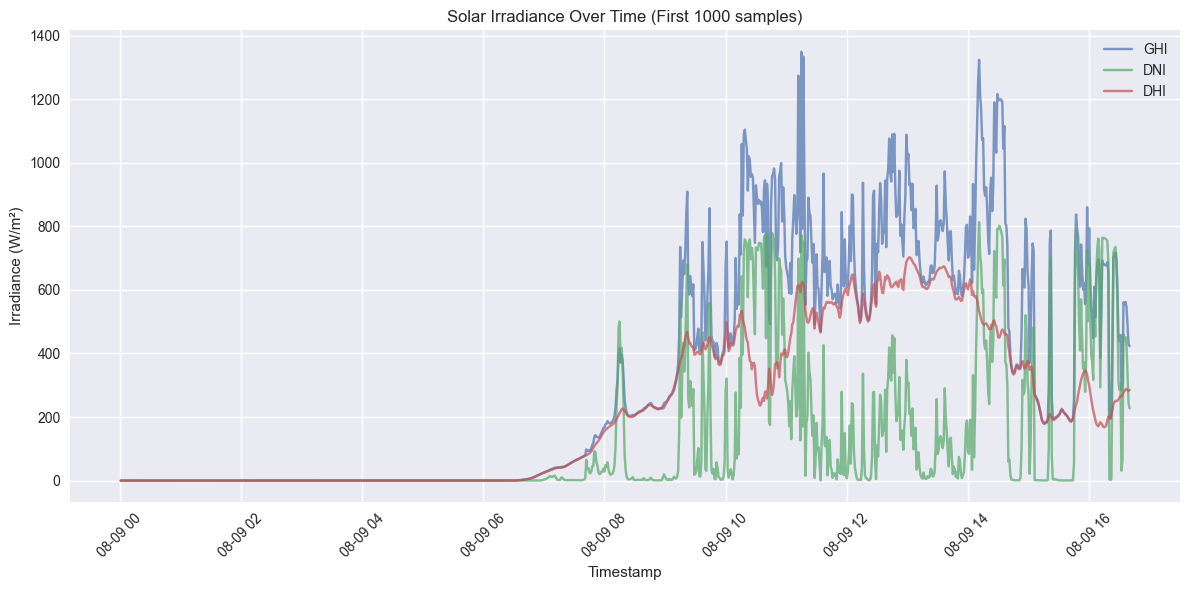

In [8]:
print("=== TIME SERIES ANALYSIS ===")

# Create a sample of data for plotting (first 1000 points for clarity)
sample_df = df.head(1000).copy()

plt.figure(figsize=(12, 6))
plt.plot(sample_df['Timestamp'], sample_df['GHI'], label='GHI', alpha=0.7)
plt.plot(sample_df['Timestamp'], sample_df['DNI'], label='DNI', alpha=0.7)
plt.plot(sample_df['Timestamp'], sample_df['DHI'], label='DHI', alpha=0.7)
plt.title('Solar Irradiance Over Time (First 1000 samples)')
plt.xlabel('Timestamp')
plt.ylabel('Irradiance (W/m²)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

=== ADVANCED TIME SERIES PATTERNS ===


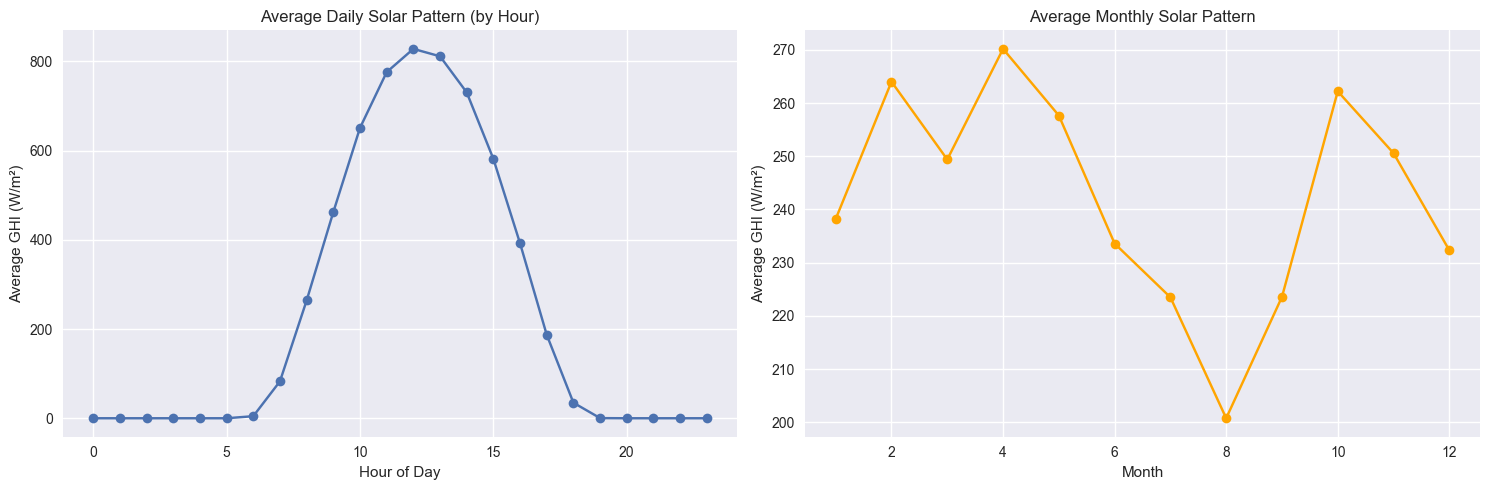

In [9]:
# === ADVANCED TIME SERIES PATTERNS ===
print("=== ADVANCED TIME SERIES PATTERNS ===")

# Extract time components for deeper analysis
df['Hour'] = df['Timestamp'].dt.hour
df['Month'] = df['Timestamp'].dt.month

# Daily pattern (average by hour)
daily_pattern = df.groupby('Hour')['GHI'].mean()
# Monthly pattern  
monthly_pattern = df.groupby('Month')['GHI'].mean()

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Daily trend
axes[0].plot(daily_pattern.index, daily_pattern.values, marker='o')
axes[0].set_title('Average Daily Solar Pattern (by Hour)')
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Average GHI (W/m²)')
axes[0].grid(True)

# Monthly trend
axes[1].plot(monthly_pattern.index, monthly_pattern.values, marker='o', color='orange')
axes[1].set_title('Average Monthly Solar Pattern')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Average GHI (W/m²)')
axes[1].grid(True)

plt.tight_layout()
plt.show()

#### Correlation Analysis & Cleaning Impact

=== CORRELATION ANALYSIS ===


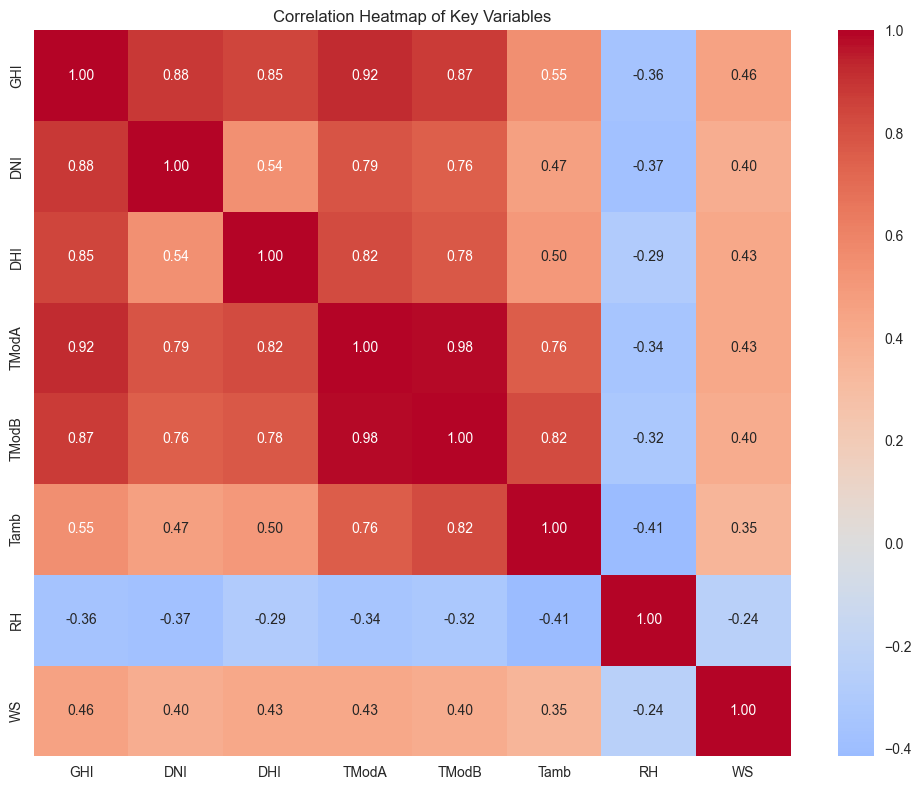

In [10]:
print("=== CORRELATION ANALYSIS ===")

# Select columns for correlation analysis
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'Tamb', 'RH', 'WS']
corr_matrix = df[corr_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap of Key Variables')
plt.tight_layout()
plt.show()

=== CLEANING IMPACT ANALYSIS ===
Average Module Readings by Cleaning Status:
                ModA        ModB
Cleaning                        
0         236.524253  228.816071
1         307.229278  301.972165


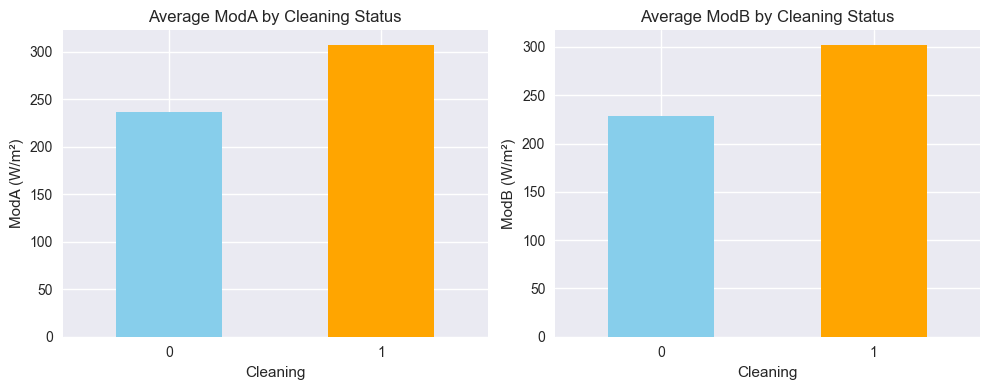

In [11]:
print("=== CLEANING IMPACT ANALYSIS ===")

# Group by Cleaning flag and compare ModA & ModB
cleaning_impact = df.groupby('Cleaning')[['ModA', 'ModB']].mean()

print("Average Module Readings by Cleaning Status:")
print(cleaning_impact)

# Plot the comparison
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
cleaning_impact['ModA'].plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Average ModA by Cleaning Status')
plt.ylabel('ModA (W/m²)')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
cleaning_impact['ModB'].plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Average ModB by Cleaning Status')
plt.ylabel('ModB (W/m²)')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

#### Distribution Analysis

=== DISTRIBUTION ANALYSIS ===


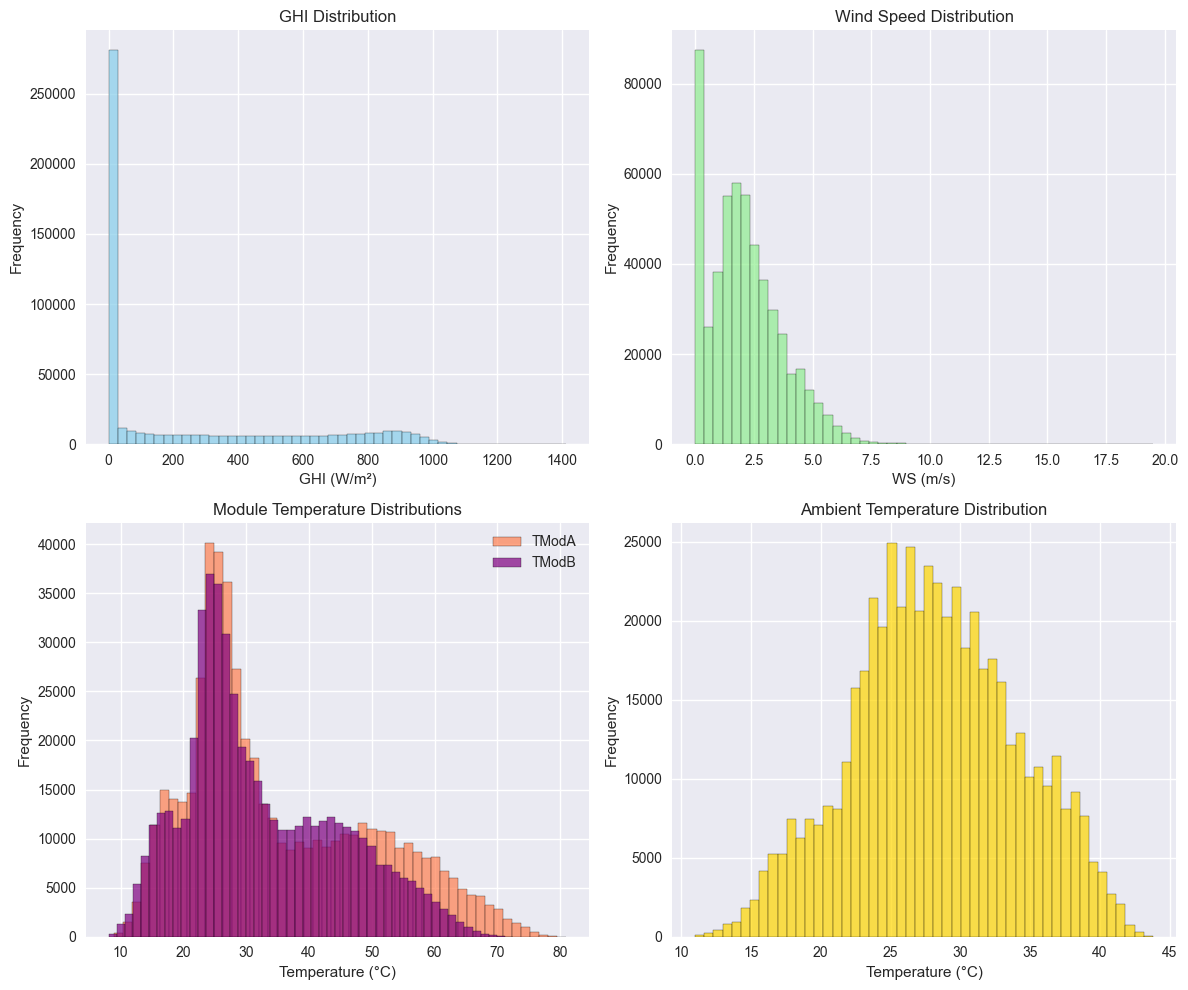

In [20]:
print("=== DISTRIBUTION ANALYSIS ===")

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# GHI Distribution
axes[0,0].hist(df['GHI'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('GHI Distribution')
axes[0,0].set_xlabel('GHI (W/m²)')
axes[0,0].set_ylabel('Frequency')

# Wind Speed Distribution
axes[0,1].hist(df['WS'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,1].set_title('Wind Speed Distribution')
axes[0,1].set_xlabel('WS (m/s)')
axes[0,1].set_ylabel('Frequency')

# Module Temperature Comparison
axes[1,0].hist(df['TModA'], bins=50, alpha=0.7, color='coral', label='TModA', edgecolor='black')
axes[1,0].hist(df['TModB'], bins=50, alpha=0.7, color='purple', label='TModB', edgecolor='black')
axes[1,0].set_title('Module Temperature Distributions')
axes[1,0].set_xlabel('Temperature (°C)')
axes[1,0].set_ylabel('Frequency')
axes[1,0].legend()

# Ambient Temperature Distribution
axes[1,1].hist(df['Tamb'], bins=50, alpha=0.7, color='gold', edgecolor='black')
axes[1,1].set_title('Ambient Temperature Distribution')
axes[1,1].set_xlabel('Temperature (°C)')
axes[1,1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

=== TEMPERATURE & HUMIDITY INFLUENCE ===


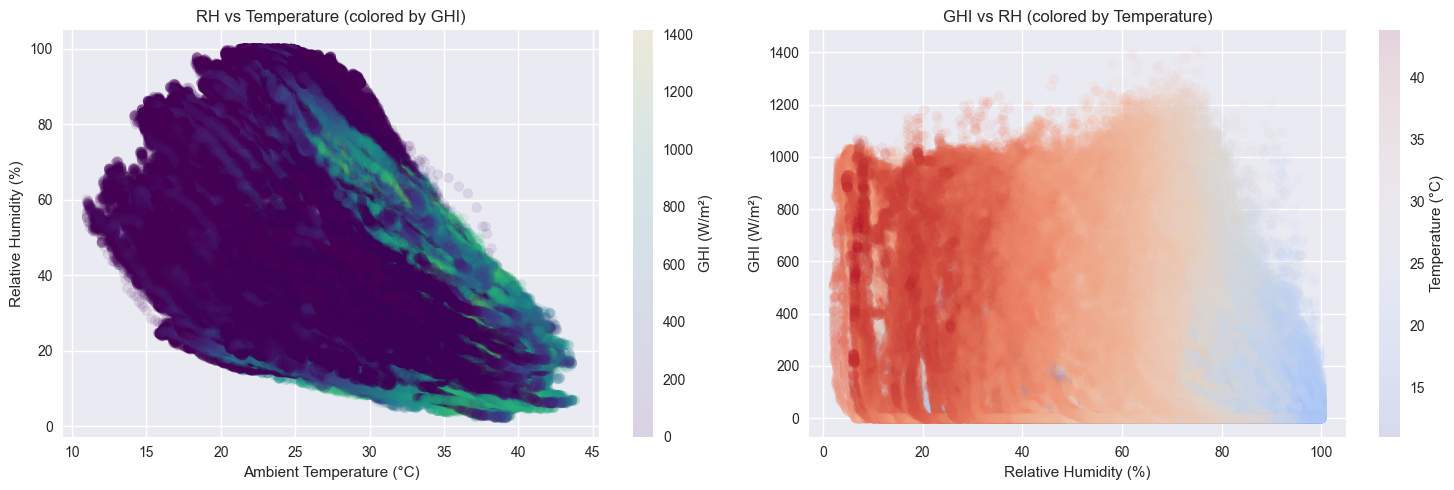

Correlation RH vs Tamb: -0.415
Correlation RH vs GHI: -0.362


In [19]:
# === TEMPERATURE & HUMIDITY INFLUENCE ===
print("=== TEMPERATURE & HUMIDITY INFLUENCE ===")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# RH vs Temperature
scatter1 = axes[0].scatter(df['Tamb'], df['RH'], alpha=0.1, c=df['GHI'], cmap='viridis')
axes[0].set_xlabel('Ambient Temperature (°C)')
axes[0].set_ylabel('Relative Humidity (%)')
axes[0].set_title('RH vs Temperature (colored by GHI)')
plt.colorbar(scatter1, ax=axes[0], label='GHI (W/m²)')

# RH vs Solar Radiation
scatter2 = axes[1].scatter(df['RH'], df['GHI'], alpha=0.1, c=df['Tamb'], cmap='coolwarm')
axes[1].set_xlabel('Relative Humidity (%)')
axes[1].set_ylabel('GHI (W/m²)')
axes[1].set_title('GHI vs RH (colored by Temperature)')
plt.colorbar(scatter2, ax=axes[1], label='Temperature (°C)')

plt.tight_layout()
plt.show()

# Correlation values
print(f"Correlation RH vs Tamb: {df['RH'].corr(df['Tamb']):.3f}")
print(f"Correlation RH vs GHI: {df['RH'].corr(df['GHI']):.3f}")

=== BUBBLE CHART ANALYSIS ===


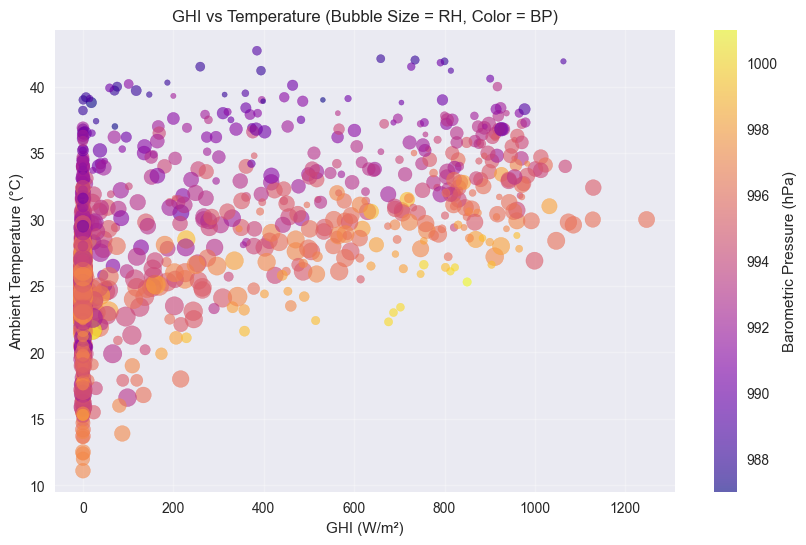

In [21]:
print("=== BUBBLE CHART ANALYSIS ===")

# Sample the data to make the bubble chart readable
sample_df = df.sample(n=1000, random_state=42)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(sample_df['GHI'], sample_df['Tamb'], 
                     s=sample_df['RH']*2,  # Bubble size based on RH
                     alpha=0.6, c=sample_df['BP'], cmap='plasma')

plt.xlabel('GHI (W/m²)')
plt.ylabel('Ambient Temperature (°C)')
plt.title('GHI vs Temperature (Bubble Size = RH, Color = BP)')
plt.colorbar(scatter, label='Barometric Pressure (hPa)')
plt.grid(True, alpha=0.3)
plt.show()

#### Save Cleaned Data

In [22]:
print("=== SAVE CLEANED DATA ===")

# Save cleaned dataset
cleaned_filepath = '../data/benin_clean.csv'
df.to_csv(cleaned_filepath, index=False)
print(f"Cleaned data saved to: {cleaned_filepath}")
print(f"Final dataset shape: {df.shape}")

# Verify the file was created
import glob
print("Files in data directory:", glob.glob('data/*.csv'))

=== SAVE CLEANED DATA ===
Cleaned data saved to: ../data/benin_clean.csv
Final dataset shape: (525600, 20)
Files in data directory: []
